<h1 style='font-size:40px'> Flight Prices Estimator</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            This project is intended to build a flight price estimator using Python's Machine Learning resources.
        </li>
        <li> 
            The dataset includes features such as the Airline company responsible for the flight; the cities of departure and destination; and the number of stops projected.
        </li>
        <li> 
            The data used was originally found on <a href='https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction'> Kaggle</a>.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Data Import & Analysis</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Most of the data in our hands is categorical. Hence, we'll have to find out a way to treat these informations so our algorithms can use them.
        </li>
    </ul>
</div>

In [206]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv', usecols=[i for i in range(1,12)])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<h2 style='font-size:30px'> Searching for NaN's</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Fortunately, all of our columns do not present null values. We do not need to find out a way to treat such kind of defect.
        </li>
    </ul>
</div>

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


<h2 style='font-size:30px'> Correcting the <em> stops</em> column</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            As <em> stops</em> refers to the quantity of stops programmed for the flights, it is reasonable to convert its values to numerical type.
        </li>
    </ul>
</div>

In [207]:
# 'two_or_more' is going to be converted as 2.
df['stops'].replace({'zero':0, 'one':1, 'two_or_more':2}, inplace=True)
df.stops.unique()

array([0, 1, 2])

<h2 style='font-size:30px'> Numerical Values Distribution</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Observing the histograms produced, it is visible that one-stop flights compose the majority of the dataset.
        </li>
        <li> 
            The <em> days_left</em> column has a well distributed data.
        </li>
        <li> 
            You can see the number of flights that have two or more stops programmed or a duration above 30 hours is proportionately low; the longest flight record cannot even be seen in the histogram! Maybe removing such cases as exceptions could enhance our models' performance.
        </li>
        <li> 
            From the DataFrame's description, the most expensive price list is above 100,000.00, which is disparate compared with the rest of the flight tickets.
        </li>
    </ul>
</div>

,stops,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,0.924312,12.221021,26.004751,20889.660523
std,0.398106,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.830000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,49.830000,49.000000,123071.000000


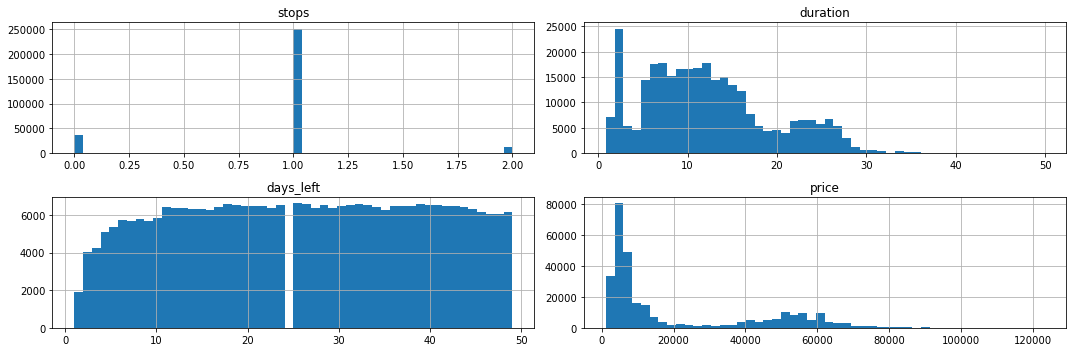

In [1062]:
display(df.describe())
df.hist(figsize=(15,5), bins=50);
plt.tight_layout()

<h2 style='font-size:30px'> Engendering Train and Test Sets</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            In our sampling, I've chosen to maintain the proportions of the airlines.
        </li>
    </ul>
</div>

In [208]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

for train_index, test_index in split.split(df, df.airline):
    train = df.loc[train_index]
    test = df.loc[test_index]

<h2 style='font-size:30px'> Exploratory Analysis on the Training Data</h2>

<h3 style='font-size:30px;font-style:italic'> Prices per company</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Companies might charge different prices depending on their target public. Luxury airlines are inclined to have more expensive tickets, for instance.
        </li>
    </ul>
</div>

In [118]:
# By observing the 'groupby' output, Vistara and Air India have the most expensive flights.
train.groupby('airline')['price'].mean().sort_values(ascending=False)

airline
Vistara      30382.636317
Air_India    23467.830284
SpiceJet      6165.781107
GO_FIRST      5654.717337
Indigo        5313.265451
AirAsia       4088.926075
Name: price, dtype: float64

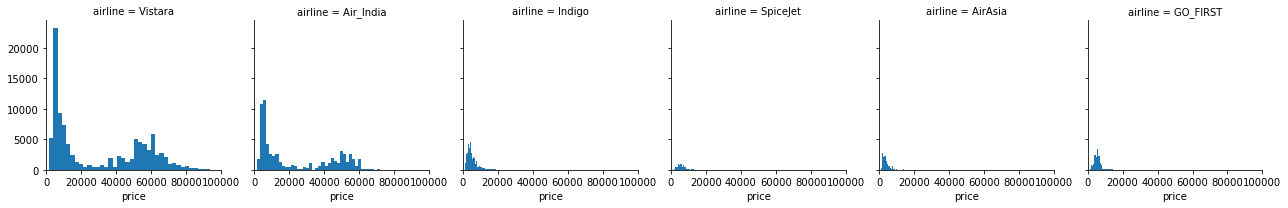

In [119]:
# Vistara and Air India also have a broader variety of prices compared to the other companies.
# Notice that except from the mentioned airlines, the price distribution for all the other companies looks like a Gaussian distribution.
import seaborn as sns
import matplotlib.pyplot as plt
airline_fg = sns.FacetGrid(data=train, col='airline', xlim=[0, 100000])

airline_fg.map(plt.hist, 'price', bins=50)

<h3 style='font-size:30px;font-style:italic'> Prices per airplane</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since we've already analyzed the prices for every airline, it would also be convenient to verify whether different aircrafts tend to have higher or lower prices.
        </li>
    </ul>
</div>

In [120]:
# And the answer is yes! Prices vary considerably depending on the airplane used.
train.groupby('flight')['price'].mean().sort_values(ascending=False)

flight
AI-433     44025.000000
UK-820     40602.498191
UK-930     40094.975684
UK-970     39429.818452
UK-996     39143.068898
               ...     
6E-7259     1105.000000
6E-7252     1105.000000
6E-7141     1105.000000
6E-7127     1105.000000
6E-557      1105.000000
Name: price, Length: 1559, dtype: float64

<h3 style='font-size:30px;font-style:italic'> Time impact on flight costs</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Let's turn our attention to the time's influence on ticket prices. If flights are scheduled to a part of the day with low demand, prices tend to be lower, for instance. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='arrival_time', ylabel='departure_time'>

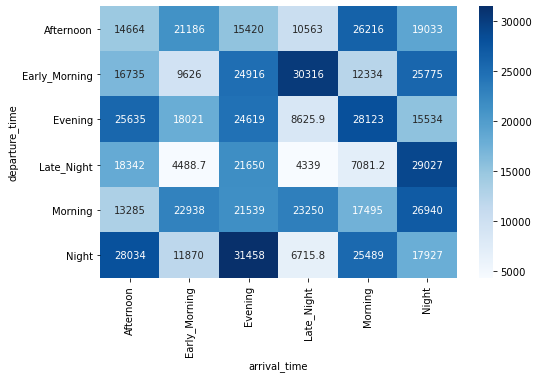

In [121]:
pivot_time = pd.pivot_table(data=train, index='departure_time', columns='arrival_time', values='price')
plt.figure(figsize=(8,5))
sns.heatmap(pivot_time, cmap='Blues', annot=True, fmt='.5g')

<h3 style='font-size:30px;font-style:italic'> Seat type influence on ticket value</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The status of your seat is an obvious aspect to regard when investigating flight prices. 
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='price', ylabel='Density'>

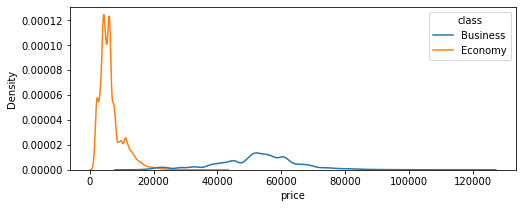

In [122]:
# The economic class tend to have prices close to 10000, whereas the business seats are usually valued between 45000 and 65000.
# Both distributions have the shape of a normal one. The curve over the economic seats is acuter than the other.
from seaborn import kdeplot
plt.figure(figsize=(8,3))
kdeplot(data=train, x='price', hue='class')

In [124]:
# Through this Group By, we are able to understand the reason for Vistara and Air India's price distributions don't have the bell shape;
# they are the only corporations that provide both Economy and Business class in their flights!
train.groupby(['airline','class']).size()

airline    class   
AirAsia    Economy     12878
Air_India  Business    26273
           Economy     38441
GO_FIRST   Economy     18538
Indigo     Economy     34496
SpiceJet   Economy      7209
Vistara    Business    48408
           Economy     53879
dtype: int64

In [49]:
# Evaluating Cohen's d for measuring the discrepancy between ticket prices for economic and business seats.
def cohensd(group1, group2):
    diff = group1.mean() - group2.mean()
    var1, var2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1+n2)
    d = diff/np.sqrt(pooled_var)
    return d

business = train[train['class']=='Business']['price']
economic = train[train['class']=='Economy']['price']

# The magnitude of the price difference between the Business and Economic classes is roughly 5.83 standard deviations.
cohensd(business, economic)

5.82988628971047

<h3 style='font-size:30px;font-style:italic'> Days lefting and Ticket Prices</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Let's visualize the prices behavior according to the amount of days for the travel.
        </li>
        <li> 
            When there are 15 days remaining, the values start going up. Additionally, a stronger increase usually happens in the last 5 days for the travels.
        </li>
    </ul>
</div>

Text(0.5, 1.0, 'Variation of the Average Prices Per Days Remaining')

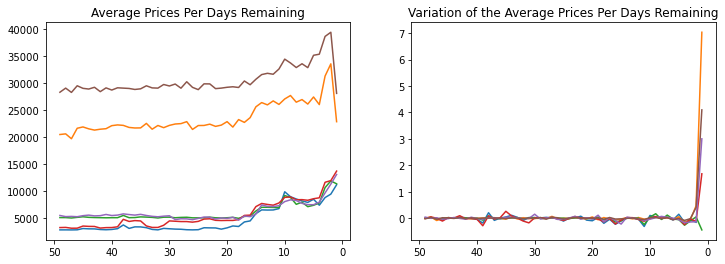

In [50]:
# Getting the average price according to the remaining days for the trip per airline.
days_price = train.groupby(['airline','days_left'])['price'].mean()

# Plotting the average prices.
plt.figure(figsize=(12,4))
fig1 = plt.subplot(121)
for airline in days_price.index.levels[0]:
    plt.plot(days_price.xs(airline, level=0), label=airline)
plt.title('Average Prices Per Days Remaining')
fig1.invert_xaxis()

# Displaying the variation of the average prices.
fig2 = plt.subplot(122)
days_price_derivative = days_price.pct_change()
for airline in days_price_derivative.index.levels[0]:
    plt.plot(days_price_derivative.xs(airline, level=0), label=airline)
fig2.invert_xaxis()
plt.title('Variation of the Average Prices Per Days Remaining')

<h2 style='font-size:30px'> Handling Potential Outliers</h2>

<h3 style='font-size:30px;font-style:italic'> Flights with 2 or more stops scheduled</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Recalling the numerical features distribution analysis, travels with 2 or more stops programmed constituted the minority of cases. Considering this, it would be convenient to certify whether that kind of flight is an outlier or not. 
        </li>
        <li> 
            By observing the summary statistics generated, two-stops flights are cheaper than the rest. Thus, having multiple interruptions  can may be regarded as a factor that turn prices down.
        </li>
    </ul>
</div>

In [209]:
# Separating the sorts of flights under scrutiny.
two_stops = train[train.stops==2]
other_stops = train[train.stops!=2]

# Displaying the results.
print('Two-Stop Flights:')
display(two_stops.describe())

print('Others:')
other_stops.describe()

Two-Stops Flights:


,stops,duration,days_left,price
count,10628.0,10628.000000,10628.000000,10628.000000
mean,2.0,15.326316,24.783873,14184.088634
std,0.0,7.386267,13.724084,17761.121043
min,2.0,3.920000,1.000000,1966.000000
25%,2.0,10.000000,13.000000,6432.000000
50%,2.0,12.710000,24.000000,8321.000000
75%,2.0,19.000000,37.000000,13474.000000
max,2.0,45.830000,49.000000,116562.000000


Others:


,stops,duration,days_left,price
count,229494.000000,229494.000000,229494.000000,229494.000000
mean,0.874123,12.078555,26.053391,21181.021103
std,0.331711,7.156447,13.554581,22851.239993
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.670000,15.000000,4748.000000
50%,1.000000,11.170000,26.000000,7404.500000
75%,1.000000,16.080000,38.000000,44144.000000
max,1.000000,49.830000,49.000000,123071.000000


<h3 style='font-size:30px;font-style:italic'> Flights with length greater than 30 hours</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Travels that have a duration of over 30 hours are proportionately scarce. It's worth seeing if maintaing them in the training set is advantageous.
        </li>
    </ul>
</div>

In [210]:
# Again, segregating the data in respect to our needs.
more_30 = train[train.duration>30]
lte_30 = train[~(train.duration>30)]

# By looking  at the stats displayed, we perceive that the '>30 Hours' group have slightly lower prices.
# Nevertheless, is that difference significant or can it be occurring by chance? Let's conduct a hypothesis test to address
# the question.
print('>30 Hours:')
display(more_30.describe())

print('<=30 Hours:')
display(lte_30.describe())

>30 Hours:


,stops,duration,days_left,price
count,1798.000000,1798.000000,1798.000000,1798.000000
mean,1.373749,33.000039,22.275306,17444.814794
std,0.483933,2.625213,14.211706,17184.076917
min,1.000000,30.080000,1.000000,4363.000000
25%,1.000000,31.080000,10.000000,7490.000000
50%,1.000000,32.170000,20.000000,11972.000000
75%,2.000000,34.250000,35.000000,15750.000000
max,2.000000,49.830000,49.000000,96617.000000


<=30 Hours:


,stops,duration,days_left,price
count,238324.000000,238324.000000,238324.000000,238324.000000
mean,0.920562,12.065550,26.025281,20897.181878
std,0.395826,6.990418,13.555761,22730.363371
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4757.000000
50%,1.000000,11.170000,26.000000,7424.000000
75%,1.000000,16.000000,38.000000,42521.000000
max,2.000000,30.000000,49.000000,123071.000000


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> T-test hypothesis testing</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            H0: Prices are equal for both of the groups.
        </li>
        <li> 
            HA: Prices are unequal for the groups.
        </li>
    </ul>
</div>

In [211]:
from scipy.stats import ttest_ind

# We'll set a 5% significance.
more_30_sample = more_30.sample(100, random_state=42).price
lte_30_sample = lte_30.sample(100, random_state=42).price

# The p-value returned was higher than the significance defined. Thus, we cannot reject the Null Hypothesis and claim that
# the prices are different.
ttest_ind(more_30_sample, lte_30_sample)[1].round(5)

0.10335

In [212]:
# Removing the flights with more than 30 hours of length.
train = train[train.duration<=30]

<h3 style='font-size:30px;font-style:italic'> Price Outliers</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            With the analyses performed, we could see that the dataset has a wide variety of prices. However, some price ranges happen to rarely occur because they comprise extreme cases; hence it could be harmful to fit our models with such exceptional instances.
        </li>
        <li> 
            But remember: we cannot treat all the flights equally because we have data from both Economy and Business classes. And as already proved, their values vary considerably.
        </li>
    </ul>
</div>

,mean,std
,price,price
class,,
Business,52524.108114,13000.645710
Economy,6528.955905,3706.545153


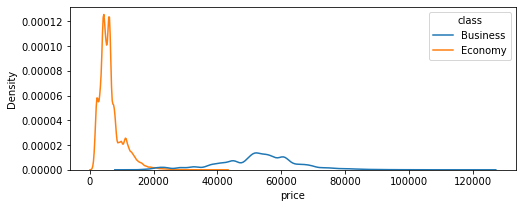

In [214]:
plt.figure(figsize=(8,3))
kdeplot(data=train, x='price', hue='class')
class_price_data = pd.pivot_table(data=train, index='class', values='price', aggfunc=[np.mean, np.std])
class_price_data

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Price Outliers Removal: Economy Class</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The methodology chosen will be the use of Standard Deviations. In this case, I am using three STD's as a parameter.
        </li>
    </ul>
</div>

In [229]:
economy_mean = class_price_data.loc['Economy', ('mean', 'price')]
economy_std = class_price_data.loc['Economy', ('std', 'price')]

no_economy_outliers = (train[(train['price'] < economy_mean + 3*economy_std) & 
                             (train['price'] > economy_mean - 3*economy_std) & 
                             (train['class']=='Economy')])

no_economy_outliers.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
146864,Air_India,AI-773,Kolkata,Evening,1,Early_Morning,Hyderabad,Economy,14.00,39,5456
37061,Air_India,AI-678,Delhi,Morning,1,Morning,Chennai,Economy,25.92,14,8885
29586,Indigo,6E-2147,Delhi,Night,0,Night,Hyderabad,Economy,2.25,9,5955
44053,Vistara,UK-954,Mumbai,Early_Morning,0,Morning,Delhi,Economy,2.08,8,5943
127678,SpiceJet,SG-8264,Kolkata,Night,1,Night,Mumbai,Economy,23.17,3,7958


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Price Outliers Removal: Business Class</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since we have proportionately fewer cases for the Business class, I will restrain myself in selecting only flights which prices deviate up to 1.5 Standard Deviation.
        </li>
    </ul>
</div>

In [238]:
business_mean = class_price_data.loc['Business', ('mean', 'price')]
business_std = class_price_data.loc['Business', ('std', 'price')]

no_business_outliers = (train[(train['price'] < business_mean + 1.5*business_std) & 
                             (train['price'] > business_mean - 1.5*business_std) & 
                             (train['class']=='Business')])

no_business_outliers.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
280021,Vistara,UK-880,Hyderabad,Afternoon,1,Night,Mumbai,Business,9.42,45,45995
279105,Air_India,AI-559,Hyderabad,Early_Morning,1,Evening,Mumbai,Business,11.50,31,45883
240707,Vistara,UK-986,Mumbai,Night,1,Evening,Hyderabad,Business,21.17,39,45805
266545,Air_India,AI-763,Kolkata,Early_Morning,1,Night,Mumbai,Business,14.58,38,50271
268076,Air_India,AI-770,Kolkata,Night,1,Morning,Bangalore,Business,12.42,14,60978


In [242]:
# Consolidating our updated dataset.
train_no_outliers = no_economy_outliers.append(no_business_outliers)
train_no_outliers.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
146864,Air_India,AI-773,Kolkata,Evening,1,Early_Morning,Hyderabad,Economy,14.00,39,5456
37061,Air_India,AI-678,Delhi,Morning,1,Morning,Chennai,Economy,25.92,14,8885
29586,Indigo,6E-2147,Delhi,Night,0,Night,Hyderabad,Economy,2.25,9,5955
44053,Vistara,UK-954,Mumbai,Early_Morning,0,Morning,Delhi,Economy,2.08,8,5943
127678,SpiceJet,SG-8264,Kolkata,Night,1,Night,Mumbai,Economy,23.17,3,7958


<h2 style='font-size:30px'> Dataset Treatment</h2>
<h3 style='font-size:30px;font-style:italic'> Textual Data</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            There are plenty of columns that present string informations. We need to somehow extract numerical data from them in order to satisfactorily feed our models.
        </li>
    </ul>
</div>

In [251]:
# For instance, we could replace the location names from 'source_city' for the average prices of the flights in the training set
# that depart from them.

# Calculating the average price for each of the 'source_city' city.
source_city_avg_prices = train_no_outliers.groupby('source_city')['price'].mean().to_dict()

# Replacing the city names with the average prices.
train_no_outliers.source_city.replace(source_city_avg_prices)

146864    20062.041046
37061     17681.427879
29586     17681.427879
44053     20042.390586
127678    20062.041046
              ...     
255357    20275.981398
270311    20062.041046
227361    20042.390586
283492    19438.168569
217851    17681.427879
Name: source_city, Length: 224693, dtype: float64

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Imagine if we did the same process shown above for all the string columns. Instead of manually replacing the categories, it is possible to construct a transformer that automates all the tasks.
        </li>
    </ul>
</div>

In [553]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeaningFromText(BaseEstimator, TransformerMixin):
    text_cols = ['airline','flight','source_city','departure_time','arrival_time','destination_city', 'class']
    numerical_data = {}
    
    # A train set needs to be informed so that the grouping operations can be done.
    def __init__(self, train_set):
        self.train_set = train_set
        
    def __str__(self):
        return 'MeaningFromText()'
    
    # 'fit' measures the average price for the categories from each column.
    def fit(self, X, y=None):
        for col in MeaningFromText.text_cols:
            avg_prices = self.train_set.groupby(col)['price'].mean().to_dict()
            MeaningFromText.numerical_data[col] = avg_prices
        return self
    
    # 'transform' takes the stats computed by 'fit' and assign them to the DataFrame.
    def transform(self, X):
        for col in MeaningFromText.numerical_data.keys():
            new_column = pd.Series(MeaningFromText.numerical_data[col], name=f'{col}_num')
            X = pd.merge(X, new_column, left_on=col, right_index=True, how='left')
            
            # Dropping out the textual column since it will have no use for the project.
            X.drop(col, axis=1, inplace=True)
        return X.values

In [350]:
# Before performing the alterations, it is convenient to already split the independent variables from the dependent ones.
X = train_no_outliers[[col for col in train_no_outliers.columns if col !='price']]
y = train_no_outliers['price']

# And voilà! Now we have only numerical data.
MeaningFromText(train_no_outliers).fit_transform(X)

array([[1.00000000e+00, 1.40000000e+01, 3.90000000e+01, ...,
        1.42400217e+04, 1.97071278e+04, 6.28757195e+03],
       [1.00000000e+00, 1.40000000e+01, 2.90000000e+01, ...,
        1.42400217e+04, 1.97071278e+04, 6.28757195e+03],
       [1.00000000e+00, 1.43300000e+01, 4.60000000e+01, ...,
        1.42400217e+04, 1.97071278e+04, 6.28757195e+03],
       ...,
       [1.00000000e+00, 8.00000000e+00, 2.60000000e+01, ...,
        1.76628098e+04, 2.00398718e+04, 5.33764134e+04],
       [1.00000000e+00, 8.00000000e+00, 3.30000000e+01, ...,
        1.76628098e+04, 2.00398718e+04, 5.33764134e+04],
       [1.00000000e+00, 6.67000000e+00, 4.50000000e+01, ...,
        1.76628098e+04, 2.00398718e+04, 5.33764134e+04]])

<h3 style='font-size:30px;font-style:italic'> Numbers Transformation & Pipeline Generation</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            I've decided to use KNNImputer for filling missing values and to scale the data with StandardScaler.
        </li>
    </ul>
</div>

In [261]:
# With 'MeaningFromText' ready, we are able to build a transformation pipeline for the whole dataset.
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Making the official data transformation pipeline for the project.
data_transformation = Pipeline([
                    ('meaning_from_text', MeaningFromText(train)),
                    ('imputer', KNNImputer()),
                    ('std_scaler', StandardScaler())])

In [351]:
# 'X_ready' is the output from the pipeline's transformations. 
X_ready = data_transformation.fit_transform(X)

<h2 style='font-size:30px'>Initial Validations</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Firstly, we are going to resort to simpler models which can provide us some sense of the minimum expected performance.      
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Elastic Net</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Let's find out the best configuration for the Elastic Net algorithm.     
        </li>
    </ul>
</div>

In [353]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
param_grid = dict(l1_ratio=np.linspace(0.5,1, 6),
                           alpha=np.logspace(0,3,4))

elnet = ElasticNet(random_state=42)
elnet_gscv = GridSearchCV(elnet, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3).fit(X_ready, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.2s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.2s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.7; total time=   0.1s
[CV 2/5] END ........................alpha=1.0,

In [354]:
# We must accept values up to 4787.21 indian ruppies as the algorithms' RMSE.
elnet_gscv.best_params_, - elnet_gscv.best_score_

({'alpha': 10.0, 'l1_ratio': 1.0}, 4787.213715362568)

<h3 style='font-size:30px;font-style:italic'> K-Nearest Neighbors</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The geometric approach of KNN makes it a simple but reliable algorithm. Let's figure out whether it can overcome the Elastic Net's RMSE.      
        </li>
    </ul>
</div>

In [289]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = dict(n_neighbors=[9,15],
                 weights=['uniform'])
knn = KNeighborsRegressor()

knn_gscv = GridSearchCV(knn, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3).fit(X_ready, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .................n_neighbors=9, weights=uniform; total time=  41.7s
[CV 2/5] END .................n_neighbors=9, weights=uniform; total time=  40.4s
[CV 3/5] END .................n_neighbors=9, weights=uniform; total time=  54.4s
[CV 4/5] END .................n_neighbors=9, weights=uniform; total time=  41.2s
[CV 5/5] END .................n_neighbors=9, weights=uniform; total time=  45.7s
[CV 1/5] END ................n_neighbors=15, weights=uniform; total time=  42.2s
[CV 2/5] END ................n_neighbors=15, weights=uniform; total time=  40.6s
[CV 3/5] END ................n_neighbors=15, weights=uniform; total time=  52.5s
[CV 4/5] END ................n_neighbors=15, weights=uniform; total time=  42.4s
[CV 5/5] END ................n_neighbors=15, weights=uniform; total time=  47.2s


In [290]:
# KNN was not able to beat Elastic Net's performance.
knn_gscv.best_score_, knn_gscv.best_params_

(-6219.020677733646, {'n_neighbors': 15, 'weights': 'uniform'})

<h3 style='font-size:30px;font-style:italic'> Ensemble Algorithms</h3>
<div> 
    <ul style='font-size:20px'cv_results_        <li> 
            Now, I am going to resort to some of the ensemble models available on Scikit-Learn. It is worth trying them considering their typical high performance.      
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Extra-Trees</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            We'll begin with the most stochastic model available, Extra-Trees. Its peculiarity is that the threshold value used to split the nodes is chosen randomly.      
        </li>
    </ul>
</div>

In [278]:
from sklearn.ensemble import ExtraTreesRegressor
param_grid = [dict(n_estimators=[25,30,35], min_samples_leaf=[25000, 45000, 60000]),
             dict(n_estimators=[30], min_impurity_decrease=[.05, .07, .13, .21],
                 max_features=[2])]
extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees_gscv = GridSearchCV(extra_trees, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3).fit(X_ready, y)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5] END ........min_samples_leaf=25000, n_estimators=25; total time=   2.4s
[CV 2/5] END ........min_samples_leaf=25000, n_estimators=25; total time=   1.8s
[CV 3/5] END ........min_samples_leaf=25000, n_estimators=25; total time=   1.7s
[CV 4/5] END ........min_samples_leaf=25000, n_estimators=25; total time=   2.1s
[CV 5/5] END ........min_samples_leaf=25000, n_estimators=25; total time=   1.7s
[CV 1/5] END ........min_samples_leaf=25000, n_estimators=30; total time=   2.0s
[CV 2/5] END ........min_samples_leaf=25000, n_estimators=30; total time=   2.0s
[CV 3/5] END ........min_samples_leaf=25000, n_estimators=30; total time=   2.1s
[CV 4/5] END ........min_samples_leaf=25000, n_estimators=30; total time=   2.6s
[CV 5/5] END ........min_samples_leaf=25000, n_estimators=30; total time=   2.6s
[CV 1/5] END ........min_samples_leaf=25000, n_estimators=35; total time=   2.4s
[CV 2/5] END ........min_samples_leaf=25000, n_e

In [281]:
# Extra-Trees probably is not the ideal algorithm to our setting.
extra_trees_gscv.best_score_, extra_trees_gscv.best_params_ 

(-8412.362443554579,
 {'max_features': 2, 'min_impurity_decrease': 0.05, 'n_estimators': 30})

In [285]:
# The report retrieved by 'cv_results' shows that using 'min_impurity_decrease' was more benefitial than resorting to 'min_samples_leaf'.
# Taking that into account might be worthy for the upcoming ensembles.
extra_trees_gscv.cv_results_['params'], extra_trees_gscv.cv_results_['mean_test_score']

([{'min_samples_leaf': 25000, 'n_estimators': 25},
  {'min_samples_leaf': 25000, 'n_estimators': 30},
  {'min_samples_leaf': 25000, 'n_estimators': 35},
  {'min_samples_leaf': 45000, 'n_estimators': 25},
  {'min_samples_leaf': 45000, 'n_estimators': 30},
  {'min_samples_leaf': 45000, 'n_estimators': 35},
  {'min_samples_leaf': 60000, 'n_estimators': 25},
  {'min_samples_leaf': 60000, 'n_estimators': 30},
  {'min_samples_leaf': 60000, 'n_estimators': 35},
  {'max_features': 2, 'min_impurity_decrease': 0.05, 'n_estimators': 30},
  {'max_features': 2, 'min_impurity_decrease': 0.07, 'n_estimators': 30},
  {'max_features': 2, 'min_impurity_decrease': 0.13, 'n_estimators': 30},
  {'max_features': 2, 'min_impurity_decrease': 0.21, 'n_estimators': 30}],
 array([-11125.94535851, -11099.81832153, -11090.17320825, -14223.02633602,
        -14209.58999495, -14212.30765183, -14461.60534445, -14438.24453689,
        -14405.93955003,  -8412.36244355,  -8426.85769448,  -9194.37142489,
         -8585.2

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Random Forest</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Random Forest is a more sophisticated model since it searches for the optimal threshold when splitting the nodes.      
        </li>
        <li> 
            Let' see whether that feature can help us achieving lower error scores.
        </li>
    </ul>
</div>

In [287]:
from sklearn.ensemble import RandomForestRegressor
param_grid = [dict(n_estimators=[30], min_impurity_decrease=[.05, .07, .13, .21],
                 max_features=[1,2])]
rdm_frst = RandomForestRegressor(random_state=42)
rdm_frst_gscv = GridSearchCV(rdm_frst, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3).fit(X_ready, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_features=1, min_impurity_decrease=0.05, n_estimators=30; total time=   7.7s
[CV 2/5] END max_features=1, min_impurity_decrease=0.05, n_estimators=30; total time=   9.8s
[CV 3/5] END max_features=1, min_impurity_decrease=0.05, n_estimators=30; total time=   7.2s
[CV 4/5] END max_features=1, min_impurity_decrease=0.05, n_estimators=30; total time=   8.1s
[CV 5/5] END max_features=1, min_impurity_decrease=0.05, n_estimators=30; total time=   8.2s
[CV 1/5] END max_features=1, min_impurity_decrease=0.07, n_estimators=30; total time=   9.1s
[CV 2/5] END max_features=1, min_impurity_decrease=0.07, n_estimators=30; total time=  10.2s
[CV 3/5] END max_features=1, min_impurity_decrease=0.07, n_estimators=30; total time=   7.5s
[CV 4/5] END max_features=1, min_impurity_decrease=0.07, n_estimators=30; total time=   7.1s
[CV 5/5] END max_features=1, min_impurity_decrease=0.07, n_estimators=30; total time=   7.1s
[CV 1/5] E

In [288]:
# Another disappointing outcome for us. 
rdm_frst_gscv.best_score_, rdm_frst_gscv.best_params_

(-10176.66167948931,
 {'max_features': 2, 'min_impurity_decrease': 0.05, 'n_estimators': 30})

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> XGBoost</h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            XGBoost might offer us a better error score than the previous two ensemble models.
        </li>
    </ul>
</div>

In [296]:
from xgboost import XGBRegressor
param_grid = [dict(max_leaves=[3,4], learning_rate=[.075, .1, .125], booster=['gbtree'])]
xgb = XGBRegressor(random_state=42)

xgb_gscv = GridSearchCV(xgb, param_grid, scoring='neg_root_mean_squared_error', cv=5, verbose=3).fit(X_ready, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  14.7s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  13.6s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  13.8s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  14.2s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  16.9s
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  13.8s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  13.5s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  14.4s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  14.3s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  13.5s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=3; total time=  13.3s
[CV 2/5] END booster=gbtree, 

In [298]:
# Great! We have another contender to deployment use.
# Apparently we've reached an error score plateau. Our best models achieved a similar mark of 4787 indian ruppies.
xgb_gscv.best_score_, xgb_gscv.best_params_

(-4801.8434277296665,
 {'booster': 'gbtree', 'learning_rate': 0.075, 'max_leaves': 3})

<h2 style='font-size:30px'> Can we somehow improve our outcomes?</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            We need to develop a strategy that can make us obtain lower RMSE's in future validations.
        </li>
        <li> 
            Considering the satisfactory performance of our XGBoost ensemble, I am going to use its "feature_importances_" array in order to filter out irrelevant features from our dataset. We can also refer to the Elastic Net's computed coefficients in order to attain some insights on the feature relevances.
        </li>
    </ul>
</div>

In [614]:
# But when both the attributes are peeked, we have a surprise. A single column is monopolizing the relevance!
print(xgb_gscv.best_estimator_.feature_importances_.round(3))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


array([ 6273.6304,  6205.6377,  6185.132 ,  6267.735 , 53241.816 ,
       53242.152 , 53591.953 , 53242.152 ], dtype=float32)

In [366]:
# The same happens with the Elastic Net...
(np.abs(elnet_gscv.best_estimator_.coef_) / np.abs(elnet_gscv.best_estimator_.coef_).sum()).round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.999])

<div> 
    <ul style='font-size:20px'> 
        <li>
            It happened that a single feature (the seat classes) was able to succesfully substantiate the predictions of our best algorithms. This was likely due to the outliers removal performed earlier; it made the flights pertained to the Economic and Business classes way too distinguishable.
        </li>
    </ul>
</div>

<AxesSubplot:xlabel='price', ylabel='Density'>

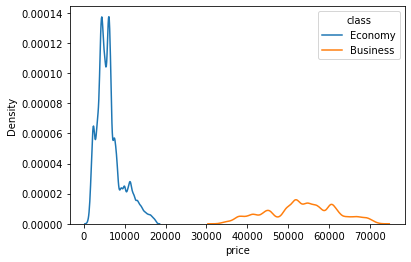

In [628]:
# The prices for both classes are visible differentiable!  
kdeplot(data=train_no_outliers, x='price', hue='class')

(0.0, 70000.0)

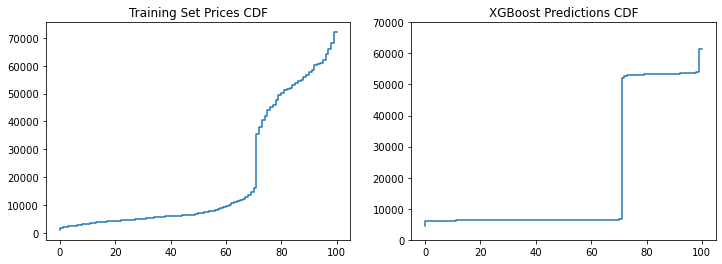

In [744]:
# Another issue: from priotizing a single feature when fitting, our models' predictions are note diverse enough. The estimations
# for the economic class are all next to 6100 indian ruppies, and around of 52000 indian ruppies for the business seats.

# Thus, in spite of their great RMSE achieved, the algorithms are actually returning excessively generalized predictions, which will not
# satisfy the potential users.

# Graphing the training set prices CDF.
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.step(list(range(0,101,1)),[np.percentile(y,i) for i in range(0,101,1)])
plt.title('Training Set Prices CDF')

# Plotting the CDF of the XGBoost estimations.
plt.subplot(122)
xgb_train_predictions = xgb_gscv.best_estimator_.predict(X_ready)
plt.step(list(range(0,101,1)),[np.percentile(xgb_train_predictions,i) for i in range(0,101,1)])
plt.title('XGBoost Predictions CDF')
plt.ylim([0, 70000])

<h2 style='font-size:30px'> Delivering more diversified outcomes</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            On account of the results obtained in the first round of validations, I thought that it would be better to designate an algorithm for each seat type. At the end of the project, the models will be bundled in a Python class.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Validations for the Economy class</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
            Let's see whether we can reach better results with this new strategy.
        </li>
    </ul>
</div>

In [666]:
# Selecting the economic tickets from the dataset.
economy_train = train_no_outliers[train_no_outliers['class'] == 'Economy']

X_train_economy = economy_train.iloc[:, :-1]
y_train_economy = economy_train['price']
economy_train['class'].unique()

array(['Economy'], dtype=object)

In [678]:
# Applying the necessary transformations on the data.
economy_data_transformation = Pipeline([
                    ('meaning_from_text', MeaningFromText(train)),
                    ('imputer', KNNImputer()),
                    ('std_scaler', StandardScaler())])
X_train_economy = economy_data_transformation.fit_transform(X_train_economy)

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Elastic Net - Economy Class Validations</h4>

In [680]:
param_grid = param_grid = dict(l1_ratio=np.linspace(0.5,1, 6),
                           alpha=np.logspace(0,3,4))

economy_elnet = ElasticNet()
economy_elnet_gscv = GridSearchCV(economy_elnet, param_grid, scoring='neg_root_mean_squared_error', 
                                  cv=5, verbose=3).fit(X_train_economy, y_train_economy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   1.0s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.1s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.1s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.7; total time=   0.1s
[CV 2/5] END ........................alpha=1.0,

In [686]:
# Great! We succeeded in achieving a lower RMSE and granting more protagonism to the other features.
print(economy_elnet_gscv.best_score_, economy_elnet_gscv.best_params_)
print(economy_elnet_gscv.best_estimator_.coef_)

-2279.353296289406 {'alpha': 1.0, 'l1_ratio': 1.0}
[  787.26694032   138.55956458 -1754.98286698   288.11866509
   579.18304981    86.75451919   -41.00580442   114.24283756
    28.96113073     0.        ]


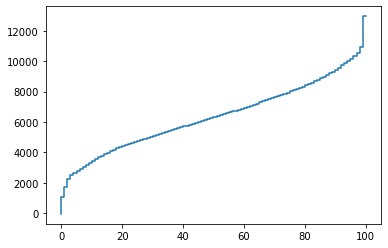

In [687]:
# The predictions curve also got smoother. That means there is a broader variety in the estimation values.
economy_elnet_pred = economy_elnet_gscv.best_estimator_.predict(X_train_economy)
plt.step(list(range(0,101,1)),[np.percentile(economy_elnet_pred,i) for i in range(0,101,1)])

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> XGBoost - Economy Class Validations</h4>

In [688]:
param_grid = [dict(max_leaves=[3,4], learning_rate=[.075, .1, .125], booster=['gbtree'])]
economy_xgb = XGBRegressor(random_state=42)

economy_xgb_gscv = GridSearchCV(economy_xgb, param_grid, scoring='neg_root_mean_squared_error', 
                                cv=5, verbose=3).fit(X_train_economy, y_train_economy)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  12.8s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  10.9s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  12.4s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  12.4s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=  12.1s
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  11.2s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  11.9s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  10.9s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  11.0s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=  11.5s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=3; total time=  10.8s
[CV 2/5] END booster=gbtree, 

-1326.727136295916 {'booster': 'gbtree', 'learning_rate': 0.125, 'max_leaves': 3}


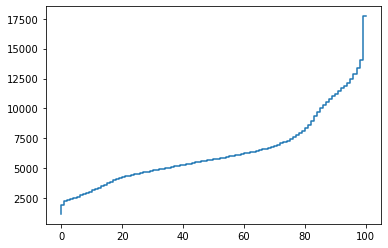

In [753]:
# XGBoost was able to go beyond the Elastic Net's performance!
print(economy_xgb_gscv.best_score_, economy_xgb_gscv.best_params_)

# And again, we've attained a smooth CDF curve.
economy_xgb_pred = economy_xgb_gscv.best_estimator_.predict(X_train_economy)
plt.step(list(range(0,101,1)),[np.percentile(economy_xgb_pred,i) for i in range(0,101,1)])

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> MLP Regressor - Economy Class Validations</h4>

In [740]:
from sklearn.neural_network import MLPRegressor
param_grid = dict(hidden_layer_sizes=[(75,25), (100,50)],
                 alpha=[.01, .05])
economy_mlp = MLPRegressor(solver='lbfgs',random_state=42)

economy_mlp_gscv =GridSearchCV(economy_mlp, param_grid, scoring='neg_root_mean_squared_error', 
                                  cv=5, verbose=3).fit(X_train_economy, y_train_economy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time= 7.7min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time= 2.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time= 2.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=36.9min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time= 5.6min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time= 4.2min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=26.1min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time= 1.5min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time= 1.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time= 2.2min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time= 2.2min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time= 2.1min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time= 2.3min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=39.9min


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [742]:
# The Neural Network has also obtained a great score!
economy_mlp_gscv.best_score_, economy_mlp_gscv.best_params_

(-1616.2924563509544, {'alpha': 0.01, 'hidden_layer_sizes': (100, 50)})

<h3 style='font-size:30px;font-style:italic'> Validations for the Business class</h3>
<div> 
    <ul style='font-size:20px'> 
        <li>
           We are going to apply the same steps now for the Business class instances.
        </li>
    </ul>
</div>

In [745]:
business_train = train_no_outliers[train_no_outliers['class'] == 'Business']

X_train_business = business_train.iloc[:, :-1]
y_train_business = business_train['price']
business_train['class'].unique()

array(['Business'], dtype=object)

In [746]:
# Applying the necessary transformations on the dataset.
business_data_transformation = Pipeline([
                    ('meaning_from_text', MeaningFromText(train)),
                    ('imputer', KNNImputer()),
                    ('std_scaler', StandardScaler())])
X_train_business= business_data_transformation.fit_transform(X_train_business)

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Elastic Net - Business Class Validations</h4>

In [747]:
param_grid = param_grid = dict(l1_ratio=np.linspace(0.5,1, 6),
                           alpha=np.logspace(0,3,4))

business_elnet = ElasticNet()
business_elnet_gscv = GridSearchCV(business_elnet, param_grid, scoring='neg_root_mean_squared_error', 
                                  cv=5, verbose=3).fit(X_train_business, y_train_business)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.2s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.0s
[CV 2/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.0s
[CV 3/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.0s
[CV 4/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.0s
[CV 5/5] END ........................alpha=1.0, l1_ratio=0.6; total time=   0.0s
[CV 1/5] END ........................alpha=1.0, l1_ratio=0.7; total time=   0.0s
[CV 2/5] END ........................alpha=1.0,

In [748]:
# The outcome was worse than the one attained with the Economy class.
business_elnet_gscv.best_score_, business_elnet_gscv.best_params_

(-6008.591584806114, {'alpha': 1.0, 'l1_ratio': 1.0})

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> XGBoost - Economy Class Validations</h4>

In [749]:
param_grid = [dict(max_leaves=[3,4], learning_rate=[.075, .1, .125], booster=['gbtree'])]
business_xgb = XGBRegressor(random_state=42)

business_xgb_gscv = GridSearchCV(business_xgb, param_grid, scoring='neg_root_mean_squared_error', 
                                cv=5, verbose=3).fit(X_train_business, y_train_business)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=   5.7s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=   4.3s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=   4.1s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=   5.0s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=3; total time=   4.1s
[CV 1/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=   4.3s
[CV 2/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=   4.2s
[CV 3/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=   5.8s
[CV 4/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=   4.1s
[CV 5/5] END booster=gbtree, learning_rate=0.075, max_leaves=4; total time=   4.3s
[CV 1/5] END booster=gbtree, learning_rate=0.1, max_leaves=3; total time=   4.2s
[CV 2/5] END booster=gbtree, 

In [750]:
# The higher RMSE's achieved must on account of the fewer instances pertained to the Business class.
business_xgb_gscv.best_score_, business_xgb_gscv.best_params_

(-3401.013142365714,
 {'booster': 'gbtree', 'learning_rate': 0.125, 'max_leaves': 3})

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> MLP Regressor - Business Class Validations</h4>

In [751]:
from sklearn.neural_network import MLPRegressor
param_grid = dict(hidden_layer_sizes=[(75,25), (100,50)],
                 alpha=[.01, .05])
business_mlp = MLPRegressor(solver='lbfgs',random_state=42)

business_mlp_gscv = GridSearchCV(business_mlp, param_grid, scoring='neg_root_mean_squared_error', 
                                  cv=5, verbose=3).fit(X_train_business, y_train_business)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time=  35.2s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time=  32.3s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time=  31.0s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time=  31.0s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END ........alpha=0.01, hidden_layer_sizes=(75, 25); total time=  29.1s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=  51.7s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=  53.9s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=  50.5s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=  52.1s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END .......alpha=0.01, hidden_layer_sizes=(100, 50); total time=  52.8s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=  29.9s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=  30.0s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=  30.0s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=  30.3s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END ........alpha=0.05, hidden_layer_sizes=(75, 25); total time=  30.6s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=  51.7s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=  51.9s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=  51.9s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=  52.3s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END .......alpha=0.05, hidden_layer_sizes=(100, 50); total time=  52.6s


/Users/felipeveiga/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [752]:
# The Neural Network did not have a satisfactory RMSE in this case...
business_mlp_gscv.best_score_, business_mlp_gscv.best_params_

(-5031.1418218513045, {'alpha': 0.05, 'hidden_layer_sizes': (100, 50)})

<h2 style='font-size:30px'> Bundling the best estimators</h2>
<div> 
    <ul style='font-size:20px'> 
        <li>
            From the validations performed, for both seat classes, the XGBoostRegressor achieved the lowest RMSE. Thus, it will be used in the Python class to be created for deployment use. 
        </li>
    </ul>
</div>

In [1001]:
from sklearn.base import RegressorMixin
from operator import itemgetter

# A transformation pipeline has been built and fitted for both kinds of seat classes.
business_pipeline = Pipeline([
                    ('meaning_from_text', MeaningFromText(train)),
                    ('imputer', KNNImputer()),
                    ('std_scaler', StandardScaler())]).fit(business_train.iloc[:, :-1], y_train_business)
    
economy_pipeline = Pipeline([
                ('meaning_from_text', MeaningFromText(train)),
                ('imputer', KNNImputer()),
                ('std_scaler', StandardScaler())]).fit(economy_train.iloc[:, :-1], y_train_economy)

class FinalPredictor(RegressorMixin):
    
    def __init__(self, business_pipeline, business_model, economy_pipeline, economy_model):
        # Two transformation pipelines need to be informed along a pair of models.
        self.business_pipeline = business_pipeline
        self.business_model = business_model
        self.economy_pipeline = economy_pipeline
        self.economy_model = economy_model
        
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        # In order preserve the instances order in the class' output, we are going to redefine the dataset index.
        X.index = range(X.shape[0]) 
        
        # Segregating the data according to the instances' seat class.
        business_dataset = X[X['class']=='Business']
        economy_dataset = X[X['class']=='Economy']
        
        # As the predictions for both sort of tickets will be appended, there is going to occur a mismatch between the estimations and
        # their respective instances. Hence, we'll need to generate a relationship between the data indices in the append product
        # and their original positions in 'X'.
        appended_business_economy = business_dataset.append(economy_dataset)
        keep_track_real_order = sorted(zip(range(appended_business_economy.shape[0]),appended_business_economy.index), key=itemgetter(1))
        
        # 'output_order' mentions the exact order the estimations need to be presented. For instance, if the 14th and 58th predictions 
        # from the append procedure actually refer to the 1st and 2nd 'X' instances, the list will exhibit [14, 58, ...].
        output_order = list(map(itemgetter(0), keep_track_real_order))
        
        # Performing the predictions for both of the datasets.
        transformed_business = self.business_pipeline.transform(business_dataset)
        business_predictions = self.business_model.predict(transformed_business)
        
        transformed_economy = self.economy_pipeline.transform(economy_dataset)
        economy_predictions = self.economy_model.predict(transformed_economy)
        
        # Appending both prediction arrays. Note that the position of the estimations is not matching the one from their respective 
        # data from 'X'.
        prediction_append = np.hstack((business_predictions, economy_predictions))
        
        # Now, displaying the predictions in the correct order using 'output_order'.
        return prediction_append[output_order]

In [1006]:
# Finally, segregating the independent and dependent variables from the test set.
X_test = test.iloc[:, :-1]
y_test = test.iloc[:,-1]
X_test.index = range(X_test.shape[0])

# Let's see how our predictions turn out to be.
test_predictions = FinalPredictor(business_pipeline, business_xgb_gscv.best_estimator_, 
                   economy_pipeline, economy_xgb_gscv.best_estimator_).predict(X_test)

In [1011]:
# We've achieved a great RMSE for the test set! 
test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
test_rmse

4171.848223323689